In [121]:
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

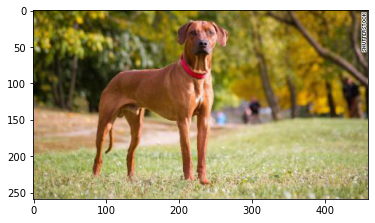

In [122]:
img_a = io.imread('image_A.jpg')

plt.imshow(img_a)

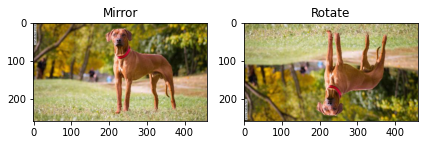

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [123]:
from skimage.transform import rotate

rotated = rotate(img_a, 180)
mirrored = img_a[:, ::-1]

f, ax = plt.subplots(nrows=1, ncols=2)

ax[0].set_title('Mirror')
ax[0].imshow(mirrored)

ax[1].set_title('Rotate')
ax[1].imshow(rotated)

plt.tight_layout()
plt.show()

io.imsave('rotate.jpg', rotated)
io.imsave('mirror.jpg', mirrored)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


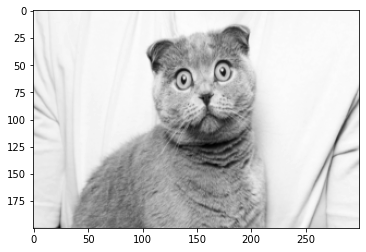

In [124]:
from skimage.color import rgb2gray
from skimage.transform import resize

img_b = io.imread('image_B.jpg')

gs_img = rgb2gray(img_b)
gs_img = resize(gs_img, (200, 300))

plt.imshow(gs_img, cmap=plt.cm.gray)

io.imsave('resize.jpg', gs_img)

## Momentos Hu

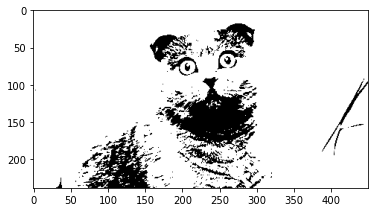

In [125]:
import cv2

im = cv2.imread('image_B.jpg', cv2.IMREAD_GRAYSCALE)
ima = cv2.imread('image_A.jpg', cv2.IMREAD_GRAYSCALE)

threshold = 130
_, im = cv2.threshold(im, threshold, 255, cv2.THRESH_BINARY)
_, ima = cv2.threshold(ima, threshold, 255, cv2.THRESH_BINARY)

plt.imshow(im, cmap=plt.cm.gray)

In [126]:
from math import copysign, log10

def calc_hu(img):
    moments = cv2.moments(img)
    hu_moments = cv2.HuMoments(moments)

    # log scale hu moments
    return [-1 * copysign(1.0, hu) * log10(abs(hu)) for hu in hu_moments]


In [127]:
calc_hu(im)

[3.0057315436561938,
 6.46716144096089,
 11.742712628354946,
 12.375658717076574,
 -24.573030907711463,
 -16.013408095690988,
 24.59843016923316]